In [1]:
import requests
import matplotlib.pyplot as plt
import random

# Using APIs to Train Models

In [16]:
YELP_TOKEN = "xLJVEKIR8kj8K1n0CcFEHGbmTj-g3TQnwihmBQOaeVicLpQ20pD0BS3gKbqFrDWD0k86hZlOFqLIk8kl3epMPEG2nMaUVNPo3lE_DvhkUCkPFaf0dhK3PaxkQmyPZXYx"

In [20]:
r = requests.get("https://api.yelp.com/v3/businesses/search?location=Toronto&limit=50", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

In [21]:
print(r.status_code, r.reason, r.content)

200 OK b'{"businesses": [{"id": "r_BrIgzYcwo1NAuG9dLbpg", "alias": "pai-northern-thai-kitchen-toronto-5", "name": "Pai Northern Thai Kitchen", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/uAnTcmLEQJWkCUOtvZMALA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=iBn3QRQE2nhH1733YvsuYQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=iBn3QRQE2nhH1733YvsuYQ", "review_count": 3562, "categories": [{"alias": "thai", "title": "Thai"}], "rating": 4.5, "coordinates": {"latitude": 43.64784, "longitude": -79.38872}, "transactions": [], "price": "$$", "location": {"address1": "18 Duncan Street", "address2": "", "address3": "", "city": "Toronto", "zip_code": "M5H 3G8", "country": "CA", "state": "ON", "display_address": ["18 Duncan Street", "Toronto, ON M5H 3G8", "Canada"]}, "phone": "+14169014724", "display_phone": "+1 416-901-4724", "distance": 3009.3347434869856}, {"id": "mZRKH9ngRY92bI_irrHq6w", "alias": 

In [22]:
r.json()

{'businesses': [{'id': 'r_BrIgzYcwo1NAuG9dLbpg',
   'alias': 'pai-northern-thai-kitchen-toronto-5',
   'name': 'Pai Northern Thai Kitchen',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/uAnTcmLEQJWkCUOtvZMALA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=iBn3QRQE2nhH1733YvsuYQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=iBn3QRQE2nhH1733YvsuYQ',
   'review_count': 3562,
   'categories': [{'alias': 'thai', 'title': 'Thai'}],
   'rating': 4.5,
   'coordinates': {'latitude': 43.64784, 'longitude': -79.38872},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '18 Duncan Street',
    'address2': '',
    'address3': '',
    'city': 'Toronto',
    'zip_code': 'M5H 3G8',
    'country': 'CA',
    'state': 'ON',
    'display_address': ['18 Duncan Street', 'Toronto, ON M5H 3G8', 'Canada']},
   'phone': '+14169014724',
   'display_phone': '+1 416-901-4724',
   'distance':

In [23]:
review_labels = []
for business in r.json()['businesses']:
    reviews = requests.get("https://api.yelp.com/v3/businesses/%s/reviews" % business['id'], headers={"Authorization": "Bearer %s" % YELP_TOKEN}).json()
    for review in reviews['reviews']:
        review_labels.append((review['text'].rstrip('.'), review['rating']))
review_labels

[('Superb. Great food and great service. Be advised debit/credit only no cash. Always a great choice',
  5),
 ('- excellent chips!\n- pad thai was spicy (level: spicy, but not thai spicy) with 5 pieces of shrimp\n- fried shrimp was excellent\n- really good pineapple',
  5),
 ("My friend loves this restaurant. Me, well, it's just ok for me. #1 way too crowded inside. People waiting by the tables to be seated makes it very",
  3),
 ("We've been twice now to have the Chef's Tasting menu and both times the service, the food and the ambiance have been unbelievable. All the staff is so sweet",
  5),
 ('Visited Richmond Station while on a business trip to Toronto, and it was a great experience. I appreciated the friendly staff and the cozy vibe. The locally',
  5),
 ("Service was excellent, wasn't too loud in the restaurant, I found this to be an enjoyable experience! \n\nPersonally felt like the food was average, I'm",
  3),
 ('Osteria Giulia is a great place to enjoy a romantic dinner with 

In [24]:
review_features = [(x.split(' '), 'positive' if y > 3 else 'negative') for (x, y) in review_labels]
review_features

[(['Superb.',
   'Great',
   'food',
   'and',
   'great',
   'service.',
   'Be',
   'advised',
   'debit/credit',
   'only',
   'no',
   'cash.',
   'Always',
   'a',
   'great',
   'choice'],
  'positive'),
 (['-',
   'excellent',
   'chips!\n-',
   'pad',
   'thai',
   'was',
   'spicy',
   '(level:',
   'spicy,',
   'but',
   'not',
   'thai',
   'spicy)',
   'with',
   '5',
   'pieces',
   'of',
   'shrimp\n-',
   'fried',
   'shrimp',
   'was',
   'excellent\n-',
   'really',
   'good',
   'pineapple'],
  'positive'),
 (['My',
   'friend',
   'loves',
   'this',
   'restaurant.',
   'Me,',
   'well,',
   "it's",
   'just',
   'ok',
   'for',
   'me.',
   '#1',
   'way',
   'too',
   'crowded',
   'inside.',
   'People',
   'waiting',
   'by',
   'the',
   'tables',
   'to',
   'be',
   'seated',
   'makes',
   'it',
   'very'],
  'negative'),
 (["We've",
   'been',
   'twice',
   'now',
   'to',
   'have',
   'the',
   "Chef's",
   'Tasting',
   'menu',
   'and',
   'both',
   '

In [25]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util
from nltk.classify import NaiveBayesClassifier

random.shuffle(review_features)
training_docs = review_features[:120]
test_docs = review_features[120:]

print("Training: %d, Testing: %d" % (len(training_docs), len(test_docs)))

sentim_analyzer = SentimentAnalyzer()

Training: 120, Testing: 30


In [26]:
all_words_neg = sentim_analyzer.all_words([nltk.sentiment.util.mark_negation(doc) for doc in training_docs])
all_words_neg

['What',
 'I',
 'love',
 'about',
 'this',
 'place',
 'is',
 'that',
 'it',
 'reminds',
 'me',
 'of',
 'a',
 'tiny',
 'whole',
 'in',
 'the',
 'wall',
 'place',
 'you',
 'find',
 'in',
 'a',
 'New',
 'York',
 'diner',
 'style,',
 'but',
 'with',
 'a',
 'very',
 'nice',
 'décor',
 'inside',
 'The',
 'food',
 'is',
 'always',
 'top',
 'notch',
 'with',
 'fresh',
 'ingredients',
 'and',
 'creative',
 'ideas',
 "\nIt's",
 'ideal',
 'for',
 'an',
 'elevated',
 'lunch',
 'or',
 'special',
 'event',
 'dinner',
 '\nThe',
 'service',
 'is',
 'always',
 'I',
 'drove',
 '1',
 'and',
 'half',
 'hr',
 'just',
 'to',
 'taste',
 'ramen',
 'in',
 'what',
 'is',
 'know',
 'as',
 'one',
 'the',
 'best',
 'ramen',
 'restaurant',
 'in',
 'Toronto.',
 'Unfortunately',
 'it',
 'did',
 'not',
 'live_NEG',
 'up_NEG',
 'to_NEG',
 'the_NEG',
 'hype._NEG',
 'It_NEG',
 'was_NEG',
 'Service',
 'Complaint',
 '-',
 'Intimidation/Harassment/Abuse\n\nI',
 'have',
 'never',
 'posted_NEG',
 'a_NEG',
 'negative_NEG',
 'r

In [27]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

In [28]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [29]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
     print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.7666666666666667
F-measure [negative]: 0
F-measure [positive]: 0.8679245283018868
Precision [negative]: 0.0
Precision [positive]: 0.8214285714285714
Recall [negative]: 0.0
Recall [positive]: 0.92


<BarContainer object of 5 artists>

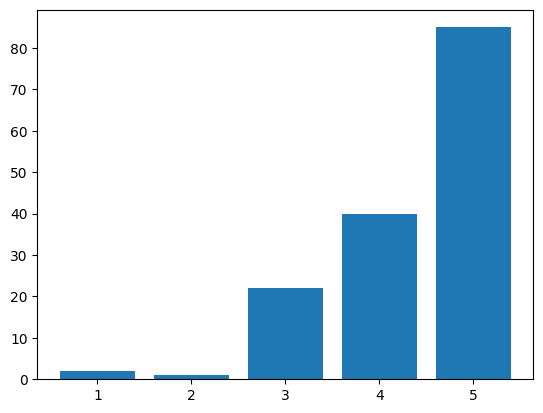

In [30]:
from collections import defaultdict

c = defaultdict(int)
for x in review_labels:
    c[x[1]] += 1

plt.bar(c.keys(), c.values())

Our results would probably be a lot better if we had more data. In addition to simply grabbing _more_ reviews, it would also help if we had **complete** reviews.

Unfortunately, the Yelp API doesn't help us out here. It only gives the first few lines of a review, enough to show in your app, but they want you to redirect your users to Yelp.com to read the whole thing.

If only there was a way...

In [38]:
review

{'id': 'S1zRYU-fxgpo2KNUiYnvDw',
 'url': 'https://www.yelp.com/biz/cafe-landwer-adelaide-and-university-toronto?adjust_creative=iBn3QRQE2nhH1733YvsuYQ&hrid=S1zRYU-fxgpo2KNUiYnvDw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=iBn3QRQE2nhH1733YvsuYQ',
 'text': 'Food is good. Shakshouka and humus are tasty. To avoid waiting for the table sign in here.',
 'rating': 5,
 'time_created': '2023-11-26 08:08:00',
 'user': {'id': '2F1nwcou-nd0ciLMqqjVAA',
  'profile_url': 'https://www.yelp.com/user_details?userid=2F1nwcou-nd0ciLMqqjVAA',
  'image_url': None,
  'name': 'Alexey F.'}}

In [32]:
print(requests.get(review['url']).text)

<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/no-js/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>
            window.yelp = window.yelp || {};
        

In [33]:
from bs4 import BeautifulSoup
import time
import urllib.parse as urlparse

In [34]:
def get_links(html):
  soup = BeautifulSoup(html, 'html.parser')
  return [urlparse.urljoin(DOMAIN, a["href"]) for a in soup.find(id="content").find_all('a') if a.get("href") and a["href"].startswith('/')]

def visit(url):
  html = requests.get(url).content
  print(url)
  return html

def bft(root, max_visits=50):
  seen = set()
  q = [root]

  while q and len(seen) < max_visits:
    n = q.pop(0)
    if n not in seen:
      html = visit(n)
      seen.add(n)
      q += get_links(html)
    time.sleep(1)

In [ ]:

bft(ROOT_NODE)